In [2]:
!pip install prophet

  Created wheel for pymeeus: filename=PyMeeus-0.5.12-py3-none-any.whl size=732018 sha256=a74ad71a7adfc37515c36af771ed0429337234d4d378abc30326cd76146cc5bd
  Stored in directory: c:\users\pooja\appdata\local\pip\cache\wheels\04\1f\e5\8dd0c661cd8d252817655dc14a84f7ae045d6616594145aa81
Successfully built pymeeus


In [30]:
import pandas as pd
from prophet import Prophet

In [31]:
df = pd.read_csv(r'C:\Users\Pooja\Documents\Hours_power_consumption_by_hours.csv')
df.head()

,ds,y
0,08-01-2023 12:00,122644.0904
1,08-01-2023 13:00,420659.7827
2,08-01-2023 14:00,705565.2583
3,08-01-2023 15:00,949359.6187
4,08-01-2023 16:00,671223.4946


In [43]:
# Split the data into training and test sets
train_data = df.iloc[:-1]  # First 7 data points for training
test_data = df.iloc[-1:]   # Last 3 data points for testing

print(train_data)
print(test_data)

                 ds            y
0  08-01-2023 12:00  122644.0904
1  08-01-2023 13:00  420659.7827
2  08-01-2023 14:00  705565.2583
3  08-01-2023 15:00  949359.6187
                 ds            y
4  08-01-2023 16:00  671223.4946


In [44]:
# Fit the Prophet model
model = Prophet()
model.fit(train_data)

# Make predictions for the test set
forecast = model.predict(test_data)

# Extract the predicted values
yhat = forecast['yhat'].values

# Extract the actual values from the test set
y_actual = test_data['y'].values

# Calculate the RMSE
rmse = sqrt(mean_squared_error(y_actual, yhat))

print("RMSE:", rmse)

00:27:47 - cmdstanpy - INFO - Chain [1] start processing
00:27:50 - cmdstanpy - INFO - Chain [1] done processing


RMSE: 521930.4716599762


In [33]:
m = Prophet()
m.fit(df)

23:54:44 - cmdstanpy - INFO - Chain [1] start processing
23:54:44 - cmdstanpy - INFO - Chain [1] done processing


In [42]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# Make predictions for the test set
#forecast = m.predict(test_data)
# Create a future DataFrame with hourly timestamps for the next 5 hours
future = pd.date_range(start=df['ds'].max(), periods=5, freq='H')
future_df = pd.DataFrame({'ds': future})
print("**future_df**", future_df)

# Generate the forecast for the future DataFrame
forecast = m.predict(future_df)

# Extract the predicted values
yhat = forecast['yhat'].values
print("**yhat**", yhat)

# Extract the actual values from the test set
y_actual = df['y'].values
print("**y_actual**", y_actual)

def mean_absolute_percentage_error(y_actual, yhat):
    return 100 * (abs(y_actual - yhat) / y_actual).mean()
mape = mean_absolute_percentage_error(y_actual, yhat)
print("**mape", mape)

# Calculate the RMSE
#rmse = sqrt(mean_squared_error(y_actual, yhat))
#Mean Absolute Error (MAE)
#from sklearn.metrics import mean_absolute_error
#mae = mean_absolute_error(y_actual, yhat)
#print("MAE:", mae)

**future_df**                    ds
0 2023-08-01 16:00:00
1 2023-08-01 17:00:00
2 2023-08-01 18:00:00
3 2023-08-01 19:00:00
4 2023-08-01 20:00:00
**yhat** [ 898451.15780561 1060903.43937866 1223355.72095171 1385808.00252477
 1548260.28409782]
**y_actual** [122644.0904 420659.7827 705565.2583 949359.6187 671223.4946]
**mape 206.9579315786675


In [12]:

# Create a future DataFrame with hourly timestamps for the next 5 hours
future = pd.date_range(start=df['ds'].max(), periods=24, freq='H')
future_df = pd.DataFrame({'ds': future})

# Generate the forecast for the future DataFrame
forecast = m.predict(future_df)



                    ds          yhat    yhat_lower    yhat_upper
0  2023-08-01 16:00:00  8.984512e+05  6.949251e+05  1.103141e+06
1  2023-08-01 17:00:00  1.060903e+06  8.541626e+05  1.263197e+06
2  2023-08-01 18:00:00  1.223356e+06  1.014781e+06  1.434055e+06
3  2023-08-01 19:00:00  1.385808e+06  1.178672e+06  1.604892e+06
4  2023-08-01 20:00:00  1.548260e+06  1.339612e+06  1.758988e+06
5  2023-08-01 21:00:00  1.710713e+06  1.505253e+06  1.922814e+06
6  2023-08-01 22:00:00  1.873165e+06  1.671376e+06  2.071453e+06
7  2023-08-01 23:00:00  2.035617e+06  1.825696e+06  2.243868e+06
8  2023-08-02 00:00:00  2.198069e+06  1.995727e+06  2.387653e+06
9  2023-08-02 01:00:00  2.360522e+06  2.144220e+06  2.559949e+06
10 2023-08-02 02:00:00  2.522974e+06  2.316418e+06  2.730607e+06
11 2023-08-02 03:00:00  2.685426e+06  2.483493e+06  2.887110e+06
12 2023-08-02 04:00:00  2.847879e+06  2.648514e+06  3.059684e+06
13 2023-08-02 05:00:00  3.010331e+06  2.817285e+06  3.205962e+06
14 2023-08-02 06:00:00  3

<Figure size 720x360 with 0 Axes>

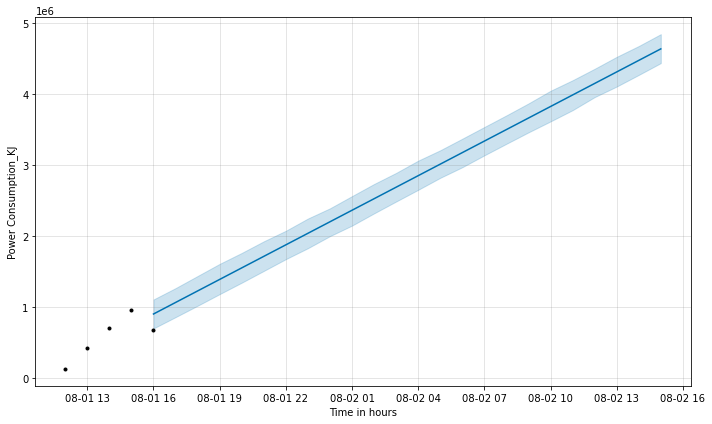

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
# Python
fig1 = m.plot(forecast)
# Customize the axis labels
plt.xlabel('Time in hours')
plt.ylabel('Power Consumption_KJ');

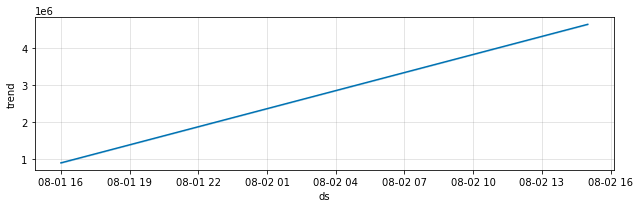

In [15]:
fig2 = m.plot_components(forecast)

In [21]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [19]:
# Python
plot_components_plotly(m, forecast)